# Fact Sheet Generator for EPHI

### Import Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from reportlab.pdfgen import canvas

### Read woreda csv

In [22]:
woreda_file = 'raw/woreda.csv'
woreda_df = pd.read_csv(woreda_file)
woreda_df.head(3)

,region,zone,woreda,wname,GPSLatitude,GPSLongitude,GPSAccuracy,PARENT_KEY,num_HC,num_HP,...,chart,trshonchart,chartupdt,frqppm,ipls,eqa,sbcc,books,stockout,Unnamed: 51
0,SNNP,Gurage,132,Abshge,8,38,3,uuid:0b4e2f79-9c9e-4a99-a18d-4006d2c20936,4.0,26.0,...,1.0,1.0,<= 1 week,Monthly,1.0,1.0,Low commitment of leadership,Others,Quinine injection,NaN
1,Tigray,Eastern Tigray,111,Adi Girat Town,14,39,5,uuid:f6b5ae14-b1fc-413e-9312-3677e2ef056e,3.0,0.0,...,1.0,1.0,≤ 3 weeks but > 2weeks,NaN,1.0,0.0,Lack of funding,Others,0 stockout,NaN
2,Tigray,Central Tigray,93,Adwa,14,39,5,uuid:e2b6eb5f-24e0-49fe-8394-973baffc4923,7.0,20.0,...,1.0,1.0,<= 1 week,Monthly,1.0,0.0,Low supports from local organization and commu...,Malaria treatment guideline,0 stockout,NaN


### Number of woredas

In [122]:
woreda_df['wname'].count()

217

### Woreda Info

GENERAL INFORMATION
----------------------------------------
SNNP
Gurage
Abshge
  HC: 4.0
  HP: 26.0


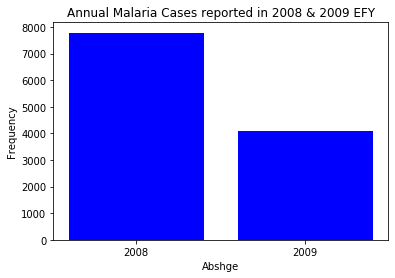

HUMAN RESOURCE
----------------------------------------
Malaria Focal Person: 1.0
Pharmacy: 1.0
HMIS: 1.0


HMIS: 1.0
Diagnosis & EQA: 0.0
Treatment: 0.0
Sever Case Management: 0.0
M&E: 0.0
Malariology: 0.0
IRTI: 2.0
iCCM: 0.0
Supply Chain Management: 0.0


FINANCE
----------------------------------------
Does the woreda allocate funds for malaria activities?  Yes


HEALTH INFORMATION SYSTEM
----------------------------------------
Does the woreda track API?  Yes
Does the woreda track TPR?  No
Does the woreda include private Health Facilities in PHEM report?  No


In [110]:
i=0
min_mb = woreda_df[['mb_2008','mb_2009']].min()
min_tick_freq = min_mb['mb_2008'] if min_mb['mb_2008'] < min_mb['mb_2009'] else min_mb['mb_2009']

max_mb = woreda_df[['mb_2008','mb_2009']].max()
max_tick_freq = max_mb['mb_2008'] if max_mb['mb_2008'] < max_mb['mb_2009'] else max_mb['mb_2009']

for index,row in woreda_df.iterrows():
    print("GENERAL INFORMATION")
    print("-"*40)
    
    print(row['region'])
    print(row['zone'])
    print(row['wname'])
    
    print("  HC: {}".format(row['num_HC']))
    print("  HP: {}".format(row['num_HP']))
    
    plt.bar(['2008','2009'],np.array([row['mb_2008'],row['mb_2009']]), color='blue')
    plt.title('Annual Malaria Cases reported in 2008 & 2009 EFY')
    #plt.xticks(np.arange(min_tick_freq, max_tick_freq, 1000.0))
    plt.xlabel(row['wname'])
    plt.ylabel('Frequency')
    plt.show()
    
    print("HUMAN RESOURCE")
    print("-"*40)
    
    print("Malaria Focal Person: {}".format(row['malfp']))
    print("Pharmacy: {}".format(row['pharm']))
    print("HMIS: {}".format(row['hmis1']))
    print("\n")
    
    print("HMIS: {}".format(row['vect']))
    print("Diagnosis & EQA: {}".format(row['dx']))
    print("Treatment: {}".format(row['rx']))
    print("Sever Case Management: {}".format(row['mxsever']))
    print("M&E: {}".format(row['sme']))
    print("Malariology: {}".format(row['malogy']))
    print("IRTI: {}".format(row['irt']))
    print("iCCM: {}".format(row['iccm']))
    print("Supply Chain Management: {}".format(row['scm']))
    
    print("\n")
    print("FINANCE")
    print("-"*40)
    
    print("Does the woreda allocate funds for malaria activities? ", end=" ")
    print("Yes" if row['bgt']== 1 else "No")
    
    print("\n")
    print('HEALTH INFORMATION SYSTEM')
    print("-"*40)
    
    print('Does the woreda track API? ', end =" ")
    print("Yes" if row['api']== 1 else "No")
    
    print('Does the woreda track TPR? ', end =" ")
    print("Yes" if row['tpr']== 1 else "No")
    
    print('Does the woreda include private Health Facilities in PHEM report? ', end =" ")
    print("Yes" if row['priv']== 1 else "No")
    
    i+=1
    if i == 1:
        break

In [112]:
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter, inch
from reportlab.platypus import Image, Paragraph, SimpleDocTemplate, Table
from reportlab.lib.styles import getSampleStyleSheet
 
doc = SimpleDocTemplate("complex_cell_values.pdf", pagesize=letter)
# container for the 'Flowable' objects
elements = []
 
styleSheet = getSampleStyleSheet()
 
I = Image('logo.png')
I.drawHeight = 1.25*inch*I.drawHeight / I.drawWidth
I.drawWidth = 1.25*inch
P0 = Paragraph('''
               <b>A pa<font color=red>r</font>a<i>graph</i></b>
               <super><font color=yellow>1</font></super>''',
               styleSheet["BodyText"])
P = Paragraph('''
    <para align=center spaceb=3>The <b>ReportLab Left
    <font color=red>Logo</font></b>
    Image</para>''',
    styleSheet["BodyText"])
data= [['A', 'B', 'C', P0, 'D'],
       ['00', '01', '02', [I,P], '04'],
       ['10', '11', '12', [P,I], '14'],
       ['20', '21', '22', '23', '24'],
       ['30', '31', '32', '33', '34']]
 
t=Table(data,style=[('GRID',(1,1),(-2,-2),1,colors.green),
                    ('BOX',(0,0),(1,-1),2,colors.red),
                    ('LINEABOVE',(1,2),(-2,2),1,colors.blue),
                    ('LINEBEFORE',(2,1),(2,-2),1,colors.pink),
                    ('BACKGROUND', (0, 0), (0, 1), colors.pink),
                    ('BACKGROUND', (1, 1), (1, 2), colors.lavender),
                    ('BACKGROUND', (2, 2), (2, 3), colors.orange),
                    ('BOX',(0,0),(-1,-1),2,colors.black),
                    ('GRID',(0,0),(-1,-1),0.5,colors.black),
                    ('VALIGN',(3,0),(3,0),'BOTTOM'),
                    ('BACKGROUND',(3,0),(3,0),colors.limegreen),
                    ('BACKGROUND',(3,1),(3,1),colors.khaki),
                    ('ALIGN',(3,1),(3,1),'CENTER'),
                    ('BACKGROUND',(3,2),(3,2),colors.beige),
                    ('ALIGN',(3,2),(3,2),'LEFT'),
])
t._argW[3]=1.5*inch
 
elements.append(t)
# write the document to disk
doc.build(elements)

In [115]:
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle
 
doc = SimpleDocTemplate("simple_table.pdf", pagesize=letter)
# container for the 'Flowable' objects
elements = []
 
data= [['00 The quick brown fox jumps over the lazy dog.'],
       ['10', '11', '12', '13', '14'],
       ['20', '21', '22', '23', '24'],
       ['30', '31', '32', '33', '34']]
t=Table(data)
t.setStyle(TableStyle([('SPAN',(0,0),(-1,-4)),
                        ('BACKGROUND',(1,1),(-2,-2),colors.green),
                       ('TEXTCOLOR',(0,0),(1,-1),colors.red)]))
elements.append(t)
# write the document to disk
doc.build(elements)